In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import textwrap
import numpy as np  # For calculating text rotation

import math

def radians_to_degrees(radians):
    degrees = radians * (180 / math.pi)
    return degrees

# Assign unique IDs to each part of the JSON data
def assign_ids(data, current_id=0):
    data['id'] = current_id
    current_id += 1
    for part in data.get('etymology', []):
        current_id = assign_ids(part, current_id)
    return current_id

# Define the etymology data for "extraordinary"
etymology_data = {
  "word": "revolution",
  "meaning": "A forcible overthrow of a government or social order, in favor of a new system; a dramatic and wide-reaching change in conditions, attitudes, or operation.",
  "example_words": ["the industrial revolution", "a revolution in consumer habits"],
  "language": "English",
  "synonyms_in_other_languages": {
    "japanese": "革命",
    "arabic": "ثورة",
    "french": "révolution",
    "chinese": "革命"
  },
  "tracing": [
    "revolution <-- Middle English (revolucioun, meaning a revolving) <-- Latin (revolutio) <-- revolvere (roll back, unroll, unfold)"
  ],
  "history": "The term 'revolution' was first used in the 14th century, primarily in astronomy, to refer to the orbital movement of a celestial body. Its use to signify a major change in political or social conditions emerged in the 17th century.",
  "parts": [
    {
      "part": "revol",
      "type": "root"
    },
    {
      "part": "-ution",
      "type": "suffix"
    }
  ],
  "etymology": [
    {
      "part": "revol",
      "meaning": "roll back, revolve",
      "example_words": ["revolve", "revolver"],
      "language": "Latin",
      "history": "Derived from Latin 'revolvere', meaning to roll back or revolve, indicating movement in a circular path.",
      "tracing": [
        "revol <-- Latin 'revolvere'"
      ],
      "etymology": [
        {
          "part": "revolvere",
          "meaning": "to roll back, unroll, unfold",
          "language": "Latin",
          "history": "Consists of 're-' (again, back) and 'volvere' (to roll), indicating the action of rolling or turning around.",
          "example_words": ["evolve", "involve", "devolve"],
          "tracing": [
            "revolvere <-- 're-' + 'volvere'"
          ],
          "etymology": [
            {
              "part": "re-",
              "meaning": "again, back",
              "language": "Proto-Indo-European",
              "history": "A common prefix in Latin and other Indo-European languages indicating repetition or backward motion.",
              "example_words": ["return", "retract", "revert"],
              "tracing": [
                "re- <-- Proto-Indo-European '*wret-, *wert-'"
              ],
              "etymology": []
            },
            {
              "part": "volvere",
              "meaning": "to roll, to turn",
              "language": "Latin",
              "history": "Related to the Proto-Indo-European root '*wel-', meaning to turn, bend.",
              "example_words": ["volume", "convolution", "involute"],
              "tracing": [
                "volvere <-- Proto-Indo-European '*wel-'"
              ],
              "etymology": [
                {
                  "part": "*wel-",
                  "meaning": "to turn, bend, roll",
                  "language": "Proto-Indo-European",
                  "history": "A root that has produced various derivatives related to turning and twisting motions.",
                  "example_words": ["well", "willow", "wallow"],
                  "tracing": [
                    "*wel- <-- Proto-Indo-European base"
                  ],
                  "etymology": []
                }
              ]
            }
          ]
        }
      ]
    },
    {
      "part": "-ution",
      "meaning": "the action or process of",
      "example_words": ["constitution", "solution", "evolution"],
      "language": "Latin",
      "history": "A suffix used to form nouns indicating the action or process of the verb it is derived from.",
      "tracing": [
        "-ution <-- Latin '-utionem, -utionis'"
      ],
      "etymology": [
        {
          "part": "-utionem, -utionis",
          "meaning": "suffix forming abstract nouns indicating action or condition",
          "language": "Latin",
          "history": "Used in the formation of abstract nouns from verbs, often denoting the result of an action or a state or condition.",
          "example_words": ["institution", "execution", "resolution"],
          "tracing": [
            "-utionem, -utionis <-- Latin verb stem + '-tion' suffix"
          ],
          "etymology": []
        }
      ]
    }
  ]
}

Node  position: (0, 0)
Node revol position: (1.4142135623730951, 1.414213562373095)
Node -ution position: (-1.4142135623730954, -1.414213562373095)
Node revolvere position: (2.4492935982947064e-16, 4.0)
Node -utionem, -utionis position: (-1.5314274795707798e-15, -4.0)
Node re- position: (4.381103154919024, 4.099504256121535)
Node volvere position: (-4.381103154918979, 4.099504256121582)
Node *wel- position: (-7.9955933452368955, -0.2654939878857388)


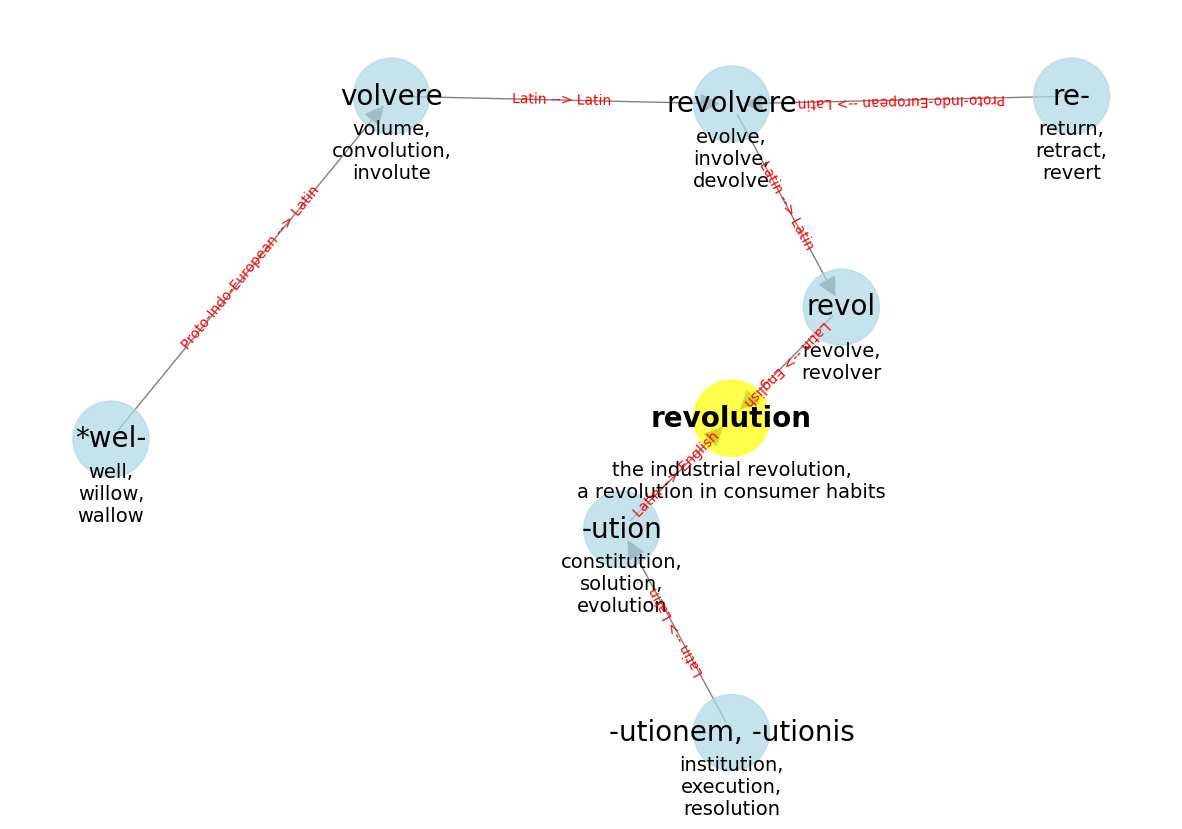

In [11]:
# Initialize unique ID assignment
assign_ids(etymology_data)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on etymology data
def add_to_graph(graph, data, parent=None):
    node_id = data['id']
    node_label = data.get('part', data.get('word', ''))
    node_data = {key: data.get(key, '') for key in ['part', 'language', 'meaning', 'example_words']}
    graph.add_node(node_id, **node_data, label=node_label)
    if parent is not None:
        graph.add_edge(parent, node_id)
    for child in data.get('etymology', []):
        add_to_graph(graph, child, node_id)

add_to_graph(G, etymology_data)

# Calculate depths for each node
depths = {}
def calculate_depths(node, depth=0):
    depths[node] = depth
    for successor in G.successors(node):
        calculate_depths(successor, depth+1)
calculate_depths(0)  # Assuming the root node has ID 0

# Group nodes by depth and calculate positions
nodes_by_depth = {}
for node, depth in depths.items():
    nodes_by_depth.setdefault(depth, []).append(node)



pos = {}
radius_increment = 2
reserved_angle = 30  # Reserved angle for the horizontal region for all nodes
rotation_offset = 90  # Rotation offset for labels

# Calculate positions for the root node separately
root_node = 0  # Assuming the root node ID is 0
pos[root_node] = (0, 0)  # Position the root node at the center

# # New approach to handle single child nodes based on their parent's position
# for depth, nodes in nodes_by_depth.items():
#     radius = depth * radius_increment
#     if depth == 0:
#         continue  # Skip the root node as it's already positioned at the center

#     if len(nodes) == 1:
#         # For a single node at this depth, find its parent and adjust its position slightly
#         parent = list(G.predecessors(nodes[0]))[0]  # Get the parent node
#         parent_angle = np.arctan2(*pos[parent][::-1])  # Calculate parent's angle based on its position
#         angle = parent_angle + np.radians(45)  # Offset from parent's angle to ensure visibility
#         pos[nodes[0]] = (radius * np.cos(angle), radius * np.sin(angle))
#         continue

#     # Adjust the total angle used for nodes to exclude the reserved horizontal region more effectively
#     total_angle = 360 - reserved_angle
#     angle_increment = total_angle / len(nodes)
#     start_angle = reserved_angle / 2 + 45  # Initial 45 degrees offset

#     for i, node in enumerate(nodes):
#         angle = np.radians(start_angle + i * angle_increment)
#         pos[node] = (radius * np.cos(angle), radius * np.sin(angle))

# # Initial location adjustment
# initial_angle = 45

# for depth, nodes in nodes_by_depth.items():
#     radius = depth * radius_increment
#     if depth == 0:
#         continue  # Skip the root node as it's already positioned at the center
    
#     # For each depth, calculate the total angle available for distribution
#     total_angle = 360 - reserved_angle
#     angle_increment = total_angle / len(nodes)
    
#     for i, node in enumerate(nodes):
#         parent = list(G.predecessors(node))[0] if G.predecessors(node) else None
#         if parent is not None:
#             # Determine if the node is the only child
#             siblings = list(G.successors(parent))
#             if len(siblings) == 1:
#                 # Inherit the parent's angle directly for a single child
#                 parent_pos = pos[parent]
#                 angle = np.arctan2(parent_pos[1], parent_pos[0]) + np.radians(initial_angle)
#             else:
#                 # Evenly distribute multiple siblings around the parent's position
#                 parent_angle = np.arctan2(pos[parent][1], pos[parent][0])
#                 offset = (siblings.index(node) - len(siblings) / 2) * angle_increment + (angle_increment / 2)
#                 angle = parent_angle + np.radians(offset)
#         else:
#             # Evenly distribute nodes at the current depth
#             angle = np.radians(initial_angle + i * angle_increment)

#         pos[node] = (radius * np.cos(angle), radius * np.sin(angle))

for depth, nodes in nodes_by_depth.items():
    radius = depth * radius_increment
    if depth == 0:
        continue  # Skip the root node as it's already positioned at the center

    # Calculate the total angle available for distribution, adjusting for depth
    total_angle = 360 - (reserved_angle if depth > 1 else 0)  # Apply reserved angle from the second level
    angle_increment = total_angle / max(len(nodes), 1)
    
    for i, node in enumerate(nodes):
        parent = list(G.predecessors(node))[0] if G.predecessors(node) else None
        # Adjust for even distribution from the initial angle for direct children of the root
        if depth == 1:
            angle = np.radians(initial_angle + i * angle_increment)
        elif parent is not None:
            # For deeper levels, adjust based on parent's position
            parent_pos = pos[parent]
            parent_angle = np.arctan2(parent_pos[1], parent_pos[0])
            
            siblings = list(G.successors(parent))
            if len(siblings) > 1:
                # Calculate sibling's angle based on its index relative to other siblings
                angle_offset = (angle_increment * (siblings.index(node) - len(siblings) / 2 + 0.5))
                angle = parent_angle + angle_offset
            else:
                # For a single child, inherit the parent's angle and apply a fixed offset
                angle = parent_angle + np.radians(initial_angle)
        else:
            angle = np.radians(initial_angle + i * angle_increment)  # Fallback for unhandled cases

        pos[node] = (radius * np.cos(angle), radius * np.sin(angle))




# pos = {}
# radius_increment = 2
# reserved_angle = 30  # Reserved angle for the horizontal region for all nodes
# rotation_offset = 90  # Rotation offset for labels

# # Calculate positions for the root node separately
# root_node = 0  # Assuming the root node ID is 0
# pos[root_node] = (0, 0)  # Position the root node at the center

# for depth, nodes in nodes_by_depth.items():
#     radius = depth * radius_increment
#     if depth == 0:
#         continue  # Skip the root node as it's already positioned at the center

#     # Handling direct children of the root node differently
#     if depth == 1:
#         total_angle = 360 - reserved_angle
#         angle_increment = total_angle / len(nodes)
#         start_angle = reserved_angle / 2
        
#         for i, node in enumerate(nodes):
#             angle = np.radians(start_angle + i * angle_increment)
#             pos[node] = (radius * np.cos(angle), radius * np.sin(angle))
#     else:
#         # For nodes that are not direct children of the root
#         for node in nodes:
#             parent = list(G.predecessors(node))[0] if G.predecessors(node) else None
#             if parent is not None:
#                 siblings = list(G.successors(parent))
                
#                 if len(siblings) == 1:
#                     # If a single child, position directly in line with the parent but further out
#                     parent_pos = pos[parent]
#                     angle = np.arctan2(parent_pos[1], parent_pos[0])
#                     pos[node] = (radius * np.cos(angle), radius * np.sin(angle))
#                 else:
#                     # For multiple siblings, distribute around the parent's position
#                     angle_per_sibling = 360 / len(siblings)  # Distribute siblings evenly
#                     parent_angle = np.arctan2(pos[parent][1], pos[parent][0])
#                     start_angle = np.degrees(parent_angle) - (angle_per_sibling * (len(siblings) - 1) / 2)
                    
#                     sibling_index = siblings.index(node)
#                     angle = np.radians(start_angle + sibling_index * angle_per_sibling)
#                     pos[node] = (radius * np.cos(angle), radius * np.sin(angle))


# Printing node positions for verificatio
# After calculating positions for all nodes
for node, position in pos.items():
    node_name = G.nodes[node]["part"]
    print(f"Node {node_name} position: {position}")
    # if node_name == "cata-":
    #     pos[node][0] *= -1


# Plotting
plt.figure(figsize=(15, 10))
node_colors = ["lightblue" if node != 0 else "yellow" for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color=node_colors, alpha=0.7)
nx.draw_networkx_edges(G, pos, arrowstyle="<|-", arrowsize=30, edge_color="gray")

for node, (x, y) in pos.items():
    label = G.nodes[node]['label']
    examples = G.nodes[node].get('example_words', [])
    example_text = "\n" * 5 + ",\n".join(examples) if examples else ""
    
    # Drawing part name
    plt.text(x, y, label, fontsize=20, fontweight="bold" if node == 0 else "normal", ha='center', va='center')
    
    # Drawing example words with adjusted positioning and rotation
    if node != 0:  # Rotate for non-root nodes
        angle = np.degrees(np.arctan2(y, x)) + rotation_offset
        # plt.text(x, y, example_text, rotation=angle, fontsize=14, ha='center', va='center', rotation_mode='anchor')
        plt.text(x, y, example_text, fontsize=14, ha='center', va='center', rotation_mode='anchor')
    else:  # Keep root node examples non-rotated
        plt.text(x, y - 0.1, example_text, fontsize=14, ha='center', va='center')
        
        
# Edge labels and additional texts
for edge in G.edges:
    source, target = edge
    source_pos, target_pos = pos[source], pos[target]
    dx, dy = target_pos[0] - source_pos[0], target_pos[1] - source_pos[1]
    angle = np.degrees(np.arctan2(dy, dx)) + 180  # Adjusting for edge labels

    label = f"{G.nodes[target]['language']} --> {G.nodes[source]['language']}"
    x, y = (source_pos[0] + target_pos[0]) / 2, (source_pos[1] + target_pos[1]) / 2
    plt.text(x, y, label, rotation=angle, rotation_mode='anchor', fontsize=10, color='red', ha='center', va='center')


plt.axis('off')
plt.show()